<a href="https://colab.research.google.com/github/maciekpiotrowski/dw_matrix_car/blob/master/patients_area_under_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd drive/My\ Drive

/content/drive/My Drive


In [3]:
df = pd.read_excel("CsA.xlsx")

In [4]:
df=df.drop(columns=['lp'])
df.head(10)

,t0 CsA,t0 AM1,t0 AM9,t0 AMN4,t0 2OHCsA,t0 3OHCsA,t0 demCsA,t1 CsA,t1 AM1,t1 AM9,t1 AM4N,t1 2OHCsA,t1 3OHCsA,t1 dem CsA,t2 CsA,t2 AM1,t2 AM9,t2 AM4N,t2 2OHCsA,t2 3OHCsA,t2 demCsA,t3 CsA,t3 AM1,t3 AM9,t3 AM4N,t3 2OHCsA,t3 3OHCsA,t3 demCsA,t4 CsA,t4 AM1,t4 AM9,t4 AM4N,t4 2OHCsA,t4 3OHCsA,t4 demCsA
0,9.502,8.520,0.993,0.296,35.864,4.791,1.092,16.003,6.993,0.933,0.256,22.610,3.324,0.578,27.602,11.435,1.605,0.614,24.568,3.327,0.661,29.235,9.772,1.484,0.559,25.756,3.029,0.538,23.631,5.377,0.876,0.242,16.051,1.695,<0.5
1,37.120,18.256,"2,0,41",0.836,43.914,12.849,2.245,36.365,15.186,2.022,0.597,33.630,9.572,1.18,51.701,20.085,2.847,0.956,36.795,6.112,0.976,48.006,10.705,1.501,0.414,22.115,4.213,"<0,5",29.815,6.282,0.940,0.121,10.077,1.465,"<0,5"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.787,9.192,1.405,0.231,55.143,34.181,3.418,11.713,8.008,1.595,0.256,62.840,43.198,4.971,10.238,8.709,2.012,0.157,69.901,52.443,5.052,18.629,10.431,2.218,0.355,63.017,46.583,4.347,15.828,7.774,1.793,0.220,42.185,30.415,2.133
4,25.739,18.231,1.993,0.817,94.611,28.571,6.932,25.460,23.543,2.652,0.611,127.147,15.293,8.583,36.270,26.306,2.886,0.944,131.915,25.572,9.122,27.447,21.586,2.273,1.116,80.787,36.269,5.321,29.144,19.213,1.913,0.982,75.961,25.374,5.536
5,10.943,4.558,0.355,0.181,97.940,43.833,5.321,16.145,4.561,0.433,0.159,74.913,31.615,5.146,15.725,0.403,0.209,70.470,29.289,4.899,5.146,26.421,6.158,0.531,0.380,81.967,34.620,6.161,34.953,11.068,0.852,0.597,124.195,37.852,9.18
6,7.673,5.503,0.943,0.188,23.915,5.954,"<0,5",7.454,5.403,0.940,0.164,27.307,8.294,"<0,5",9.339,11.065,1.934,0.419,40.822,9.447,0.752,13.886,8.643,1.582,0.384,34.937,10.443,"<0,5",13.680,7.790,1.460,0.284,30.706,8.875,"<0,5"


In [5]:
ar=df.to_numpy()
#print(type(ar))
#print(ar=='<0,5')
ar=np.where(ar=='<0.5',0,ar)
ar=np.where(ar=='<0,5',0,ar)
ar=np.where(ar=='2,0,41',float('2.041'),ar)

In [6]:
ar.shape

(7, 35)

In [7]:
data=np.empty((7,5,7))
for i in range(0,7): #patients
  for j in range(0,5): #times
    for k in range(0,7): #meas
      #print('data[{0},{1},{2}]={3}, ar[{0},{1}*7+{2}]={4}'.format(i,j,k,data[i,j,k],ar[i,j*7+k]))
      data[i,j,k]=ar[i,j*7+k]

In [8]:
data

array([[[9.50200e+00, 8.52000e+00, 9.93000e-01, 2.96000e-01,
         3.58640e+01, 4.79100e+00, 1.09200e+00],
        [1.60030e+01, 6.99300e+00, 9.33000e-01, 2.56000e-01,
         2.26100e+01, 3.32400e+00, 5.78000e-01],
        [2.76020e+01, 1.14350e+01, 1.60500e+00, 6.14000e-01,
         2.45680e+01, 3.32700e+00, 6.61000e-01],
        [2.92350e+01, 9.77200e+00, 1.48400e+00, 5.59000e-01,
         2.57560e+01, 3.02900e+00, 5.38000e-01],
        [2.36310e+01, 5.37700e+00, 8.76000e-01, 2.42000e-01,
         1.60510e+01, 1.69500e+00, 0.00000e+00]],

       [[3.71200e+01, 1.82560e+01, 2.04100e+00, 8.36000e-01,
         4.39140e+01, 1.28490e+01, 2.24500e+00],
        [3.63650e+01, 1.51860e+01, 2.02200e+00, 5.97000e-01,
         3.36300e+01, 9.57200e+00, 1.18000e+00],
        [5.17010e+01, 2.00850e+01, 2.84700e+00, 9.56000e-01,
         3.67950e+01, 6.11200e+00, 9.76000e-01],
        [4.80060e+01, 1.07050e+01, 1.50100e+00, 4.14000e-01,
         2.21150e+01, 4.21300e+00, 0.00000e+00],
        

In [9]:
patients=data.shape[0]
times=data.shape[1]
meas=data.shape[2]
augmented_data=np.empty((patients,2,meas))
augmented_data[:,:,:]=np.nan
final_data=np.append(data,augmented_data,axis=1)
final_data[:,times+1,:]=final_data[:,0,:] #copy starting value
final_data[:,times,:]=(final_data[:,times+1,:]+final_data[:,times-1,:])/2 #fill out gaps

In [10]:
final_data

array([[[9.502000e+00, 8.520000e+00, 9.930000e-01, 2.960000e-01,
         3.586400e+01, 4.791000e+00, 1.092000e+00],
        [1.600300e+01, 6.993000e+00, 9.330000e-01, 2.560000e-01,
         2.261000e+01, 3.324000e+00, 5.780000e-01],
        [2.760200e+01, 1.143500e+01, 1.605000e+00, 6.140000e-01,
         2.456800e+01, 3.327000e+00, 6.610000e-01],
        [2.923500e+01, 9.772000e+00, 1.484000e+00, 5.590000e-01,
         2.575600e+01, 3.029000e+00, 5.380000e-01],
        [2.363100e+01, 5.377000e+00, 8.760000e-01, 2.420000e-01,
         1.605100e+01, 1.695000e+00, 0.000000e+00],
        [1.656650e+01, 6.948500e+00, 9.345000e-01, 2.690000e-01,
         2.595750e+01, 3.243000e+00, 5.460000e-01],
        [9.502000e+00, 8.520000e+00, 9.930000e-01, 2.960000e-01,
         3.586400e+01, 4.791000e+00, 1.092000e+00]],

       [[3.712000e+01, 1.825600e+01, 2.041000e+00, 8.360000e-01,
         4.391400e+01, 1.284900e+01, 2.245000e+00],
        [3.636500e+01, 1.518600e+01, 2.022000e+00, 5.970000e-0

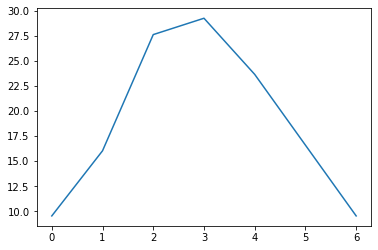

In [11]:
plt.plot(final_data[0,:,0])

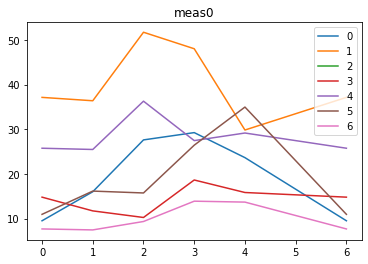

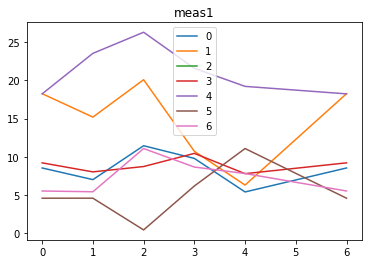

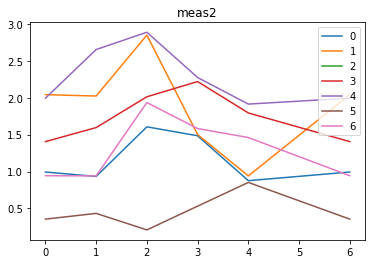

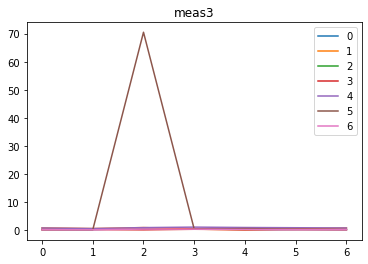

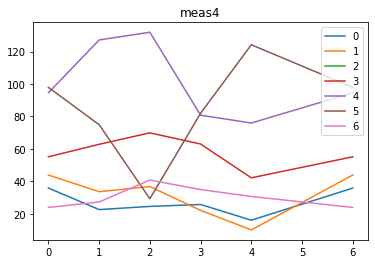

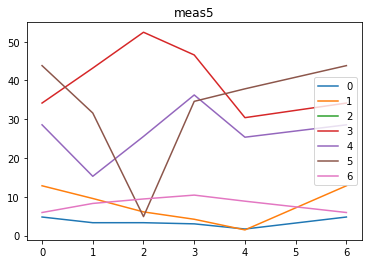

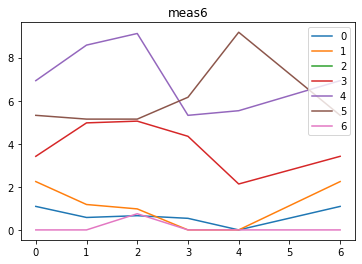

In [12]:
for meas in range(0,7):
  for patient in range(0,7):
    plt.title('meas{}'.format(meas))
    plt.plot(final_data[patient,:,meas])
    #print(data[patient,:,meas])
  plt.legend(range(0,patients))
  plt.show()

In [13]:
from scipy.integrate import simps
from numpy import trapz

In [14]:
dosage=np.zeros((final_data.shape[0],final_data.shape[1],2))
dx=1
for patient in range(0,final_data.shape[0]):
  #print('patient:{}'.format(patient))
  for meas in range(0,final_data.shape[2]):
    #print('patient:{}, meas:{}'.format(patient,meas))
    # Compute the area using the composite trapezoidal rule.
    area_traps = trapz(final_data[patient,:,meas], dx=dx)
    #print("area trapezoidal=", area_traps)
    # Compute the area using the composite Simpson's rule.
    area_simps = simps(final_data[patient,:,meas], dx=dx)
    #print("area Simpson's=", area_simps)
    dosage[patient,meas,0]=area_traps/6
    dosage[patient,meas,1]=area_simps/6

In [15]:
dosage

array([[[2.04232500e+01, 2.04826667e+01],
        [8.17425000e+00, 8.08433333e+00],
        [1.13758333e+00, 1.13077778e+00],
        [3.72666667e-01, 3.68888889e-01],
        [2.51344167e+01, 2.50144444e+01],
        [3.23483333e+00, 3.22277778e+00],
        [5.69166667e-01, 5.64111111e-01]],

       [[3.94124167e+01, 3.93681111e+01],
        [1.37971667e+01, 1.34381111e+01],
        [1.80691667e+00, 1.76166667e+00],
        [5.67083333e-01, 5.43555556e-01],
        [2.89210833e+01, 2.84741111e+01],
        [6.89466667e+00, 6.92333333e+00],
        [9.20583333e-01, 8.69555556e-01]],

       [[           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan]],

       [[1.44170833e+01, 1.46835556e+01],
        [8.76616667e+00, 8.83544444e+00],
        [1.77033333e+00, 1.7

In [16]:
#check if it matters if we assume 12 or 6 hours; it doesn't
dos=simps(final_data[0,:,0],dx=1)
dos2=simps(y=final_data[0,:,0],x=[0,2,4,6,8,10,12],dx=1)
print(final_data[0,:,0])
print(dos)
print(dos2)

[ 9.502  16.003  27.602  29.235  23.631  16.5665  9.502 ]
122.89599999999999
245.79199999999997


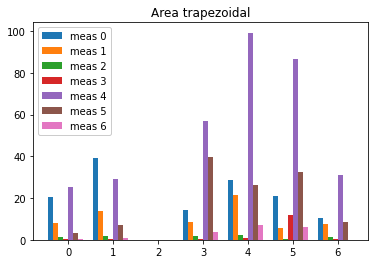

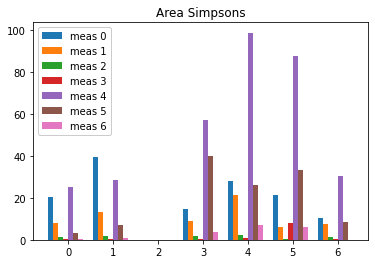

In [17]:
label=('Area trapezoidal','Area Simpson''s')
for agg_type in (0,1):
  chart_data=dosage[:,:,agg_type]
  x = np.arange(chart_data.shape[0])
  dx = (np.arange(chart_data.shape[1])-chart_data.shape[1]/2.)/(chart_data.shape[1]+2.)
  d = 1./(chart_data.shape[1]+2.)
  fig, ax=plt.subplots()
  for i in range(chart_data.shape[1]):
      ax.bar(x+dx[i],chart_data[:,i], width=d, label="meas {}".format(i))
  plt.legend(framealpha=1)
  plt.title(label[agg_type])
  plt.show()

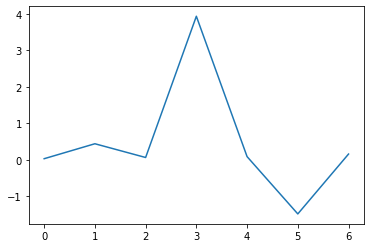

In [18]:
dosage_diff=dosage[:,:,0]-dosage[:,:,1]
np.nansum(dosage_diff,axis=0)
plt.plot(np.nansum(dosage_diff,axis=0))

In [19]:
np.set_printoptions(precision=2,suppress=1)
dosage[:,:,1]

array([[20.48,  8.08,  1.13,  0.37, 25.01,  3.22,  0.56],
       [39.37, 13.44,  1.76,  0.54, 28.47,  6.92,  0.87],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [14.68,  8.84,  1.78,  0.25, 57.36, 40.13,  3.87],
       [27.98, 21.27,  2.28,  0.89, 98.77, 26.29,  6.87],
       [21.41,  5.9 ,  0.51,  8.12, 87.48, 33.42,  6.31],
       [10.52,  7.3 ,  1.31,  0.27, 30.51,  8.51,  0.08]])

In [20]:
dosage[:,:,1].tofile("dosage.csv",sep="\n",)

{'boxes': [<matplotlib.lines.Line2D at 0x7f990f11b940>],
 'caps': [<matplotlib.lines.Line2D at 0x7f990f0ab390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f990f0abe10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f990f0aba90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f990f11bc50>,
  <matplotlib.lines.Line2D at 0x7f990f11bfd0>]}

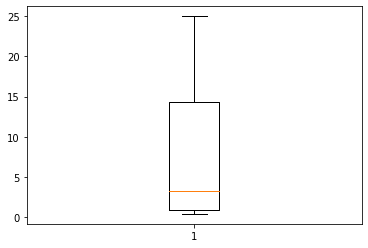

In [21]:
plt.boxplot(dosage[0,:,1])

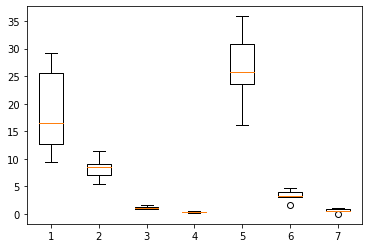

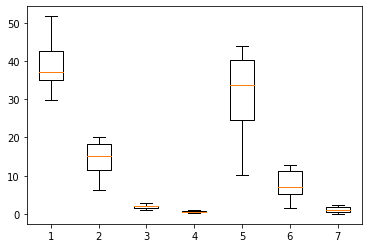

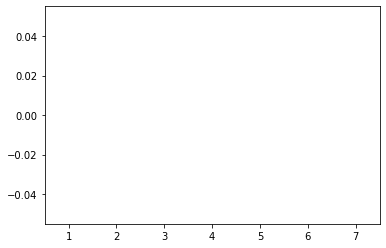

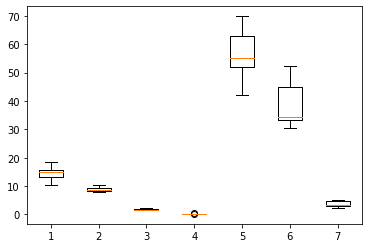

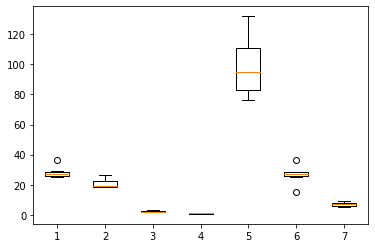

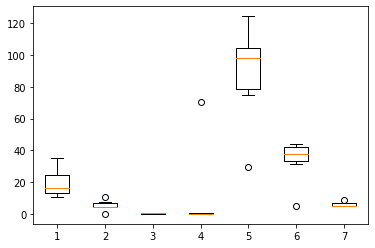

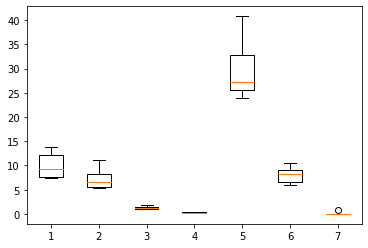

In [96]:
#fig, axs = plt.subplots(1,7)
for meas in range(7):
  fig, ax = plt.subplots()
  ax.boxplot(final_data[meas,:,:])
  


{'boxes': [<matplotlib.lines.Line2D at 0x7f9908f90cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9908f1f550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9908f1ffd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9908f1fc50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9908f90e10>,
  <matplotlib.lines.Line2D at 0x7f9908ef9f98>]}

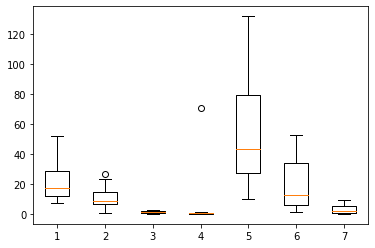

In [176]:
final_data
to_draw=final_data.transpose(2,1,0).reshape(7,49)
to_draw_t=to_draw.transpose(1,0)
to_draw_t_clean=to_draw_t[~np.isnan(to_draw_t)]
to_draw_final=to_draw_t_clean.reshape(42,7)
plt.boxplot(to_draw_final)

In [178]:
to_draw_final[:,2]

array([0.99, 2.04, 1.41, 1.99, 0.35, 0.94, 0.93, 2.02, 1.59, 2.65, 0.43,
       0.94, 1.6 , 2.85, 2.01, 2.89, 0.21, 1.93, 1.48, 1.5 , 2.22, 2.27,
       0.53, 1.58, 0.88, 0.94, 1.79, 1.91, 0.85, 1.46, 0.93, 1.49, 1.6 ,
       1.95, 0.6 , 1.2 , 0.99, 2.04, 1.41, 1.99, 0.35, 0.94])